In [80]:
pip install klib

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import klib as kl 
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [21]:
train = pd.read_csv("C:/Users/VIDYA RAJU/Downloads/Train_data.csv")

In [24]:
test = pd.read_csv("C:/Users/VIDYA RAJU/Downloads/Test_data.csv")

In [25]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [26]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [28]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

D:\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='class', ylabel='count'>

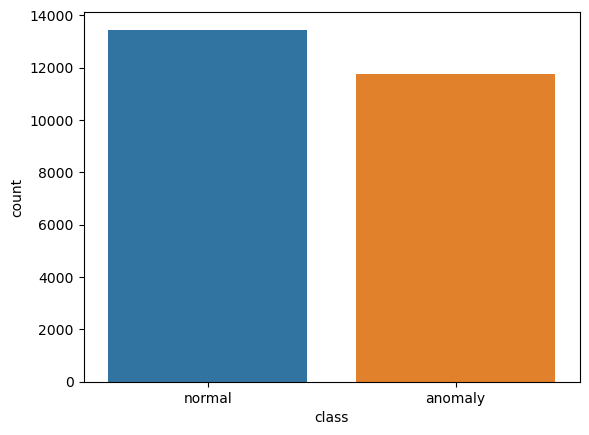

In [29]:
sns.countplot(x=train['class'])

In [30]:
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [32]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [33]:
train.shape

(25192, 42)

In [34]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
  null_count = train[col].isnull().sum()
  per = (null_count/total) * 100
  print(f"{col}: {null_count} ({round(per,3)}%)")

In [35]:
print(f"Number of duplicate rows : {train.duplicated().sum()}")

Number of duplicate rows : 0


In [36]:
train.drop_duplicates(keep=False)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [37]:
print(f"Number of duplicate rows : {train.duplicated()}")

Number of duplicate rows : 0        False
1        False
2        False
3        False
4        False
         ...  
25187    False
25188    False
25189    False
25190    False
25191    False
Length: 25192, dtype: bool


In [38]:
cat_col = [col for col in train.columns if train[col].dtype == 'object']
print('Categorical columns :',cat_col)

num_col = [col for col in train.columns if train[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['protocol_type', 'service', 'flag', 'class']
Numerical columns : ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [39]:
train[cat_col].nunique()

protocol_type     3
service          66
flag             11
class             2
dtype: int64

In [40]:
print(train['protocol_type'].unique())
print(train['service'].unique())
print(train['flag'].unique())
print(train['class'].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'anomaly']


In [41]:
train['protocol_type'].value_counts()
train['service'].value_counts()
train['flag'].value_counts()
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [42]:
def labelEncode(dataset):
  for col in dataset.columns:
    if dataset[col].dtype == 'object':
      label_encoder = LabelEncoder()
      dataset[col] = label_encoder.fit_transform(dataset[col])

labelEncode(train)
labelEncode(test)

In [43]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [44]:
X_train = train.drop(['class'],axis = 1)
Y_train = train['class']

In [45]:
Y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int32

In [46]:
Y_train.shape

(25192,)

In [47]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

In [48]:
X_train.shape

(25192, 41)

In [49]:
Y_train.shape

(25192,)

In [50]:
X_train

array([[-0.11355066, -0.12606067, -0.64538418, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066,  2.21591606,  0.76892549, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.12606067,  1.09035951, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.12606067,  1.09035951, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.12606067,  0.57606508, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.12606067, -0.77395779, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [51]:
# x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
# x_train

In [52]:
# y_train

In [53]:
# x_train.shape

In [54]:
# y_train.shape

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int32  
 2   service                      25192 non-null  int32  
 3   flag                         25192 non-null  int32  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [56]:
pip install --upgrade pandas

     ---------------------------------------- 10.8/10.8 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda3\\Lib\\site-packages\\~andas.libs\\msvcp140-59fdf63e48138046aebeb6ddb5b4e960.dll'
Consider using the `--user` option or check the permissions.



In [57]:
#pearson

In [58]:
pip install matplotlib seaborn pandas

In [59]:
train.corrwith(train['class'])

D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


duration                      -0.050901
protocol_type                  0.283653
service                       -0.270494
flag                           0.651309
src_bytes                     -0.005743
dst_bytes                      0.010949
land                          -0.000605
wrong_fragment                -0.097625
urgent                        -0.006743
hot                            0.012839
num_failed_logins             -0.000028
logged_in                      0.688084
num_compromised                0.018620
root_shell                     0.018579
su_attempted                   0.025851
num_root                       0.019753
num_file_creations             0.018322
num_shells                     0.013454
num_access_files               0.036999
num_outbound_cmds                   NaN
is_host_login                       NaN
is_guest_login                 0.038662
count                         -0.578790
srv_count                     -0.002370
serror_rate                   -0.649952


In [60]:
columns_to_drop = ['num_outbound_cmds', 'is_host_login']
train_cleaned = train.drop(columns=columns_to_drop)

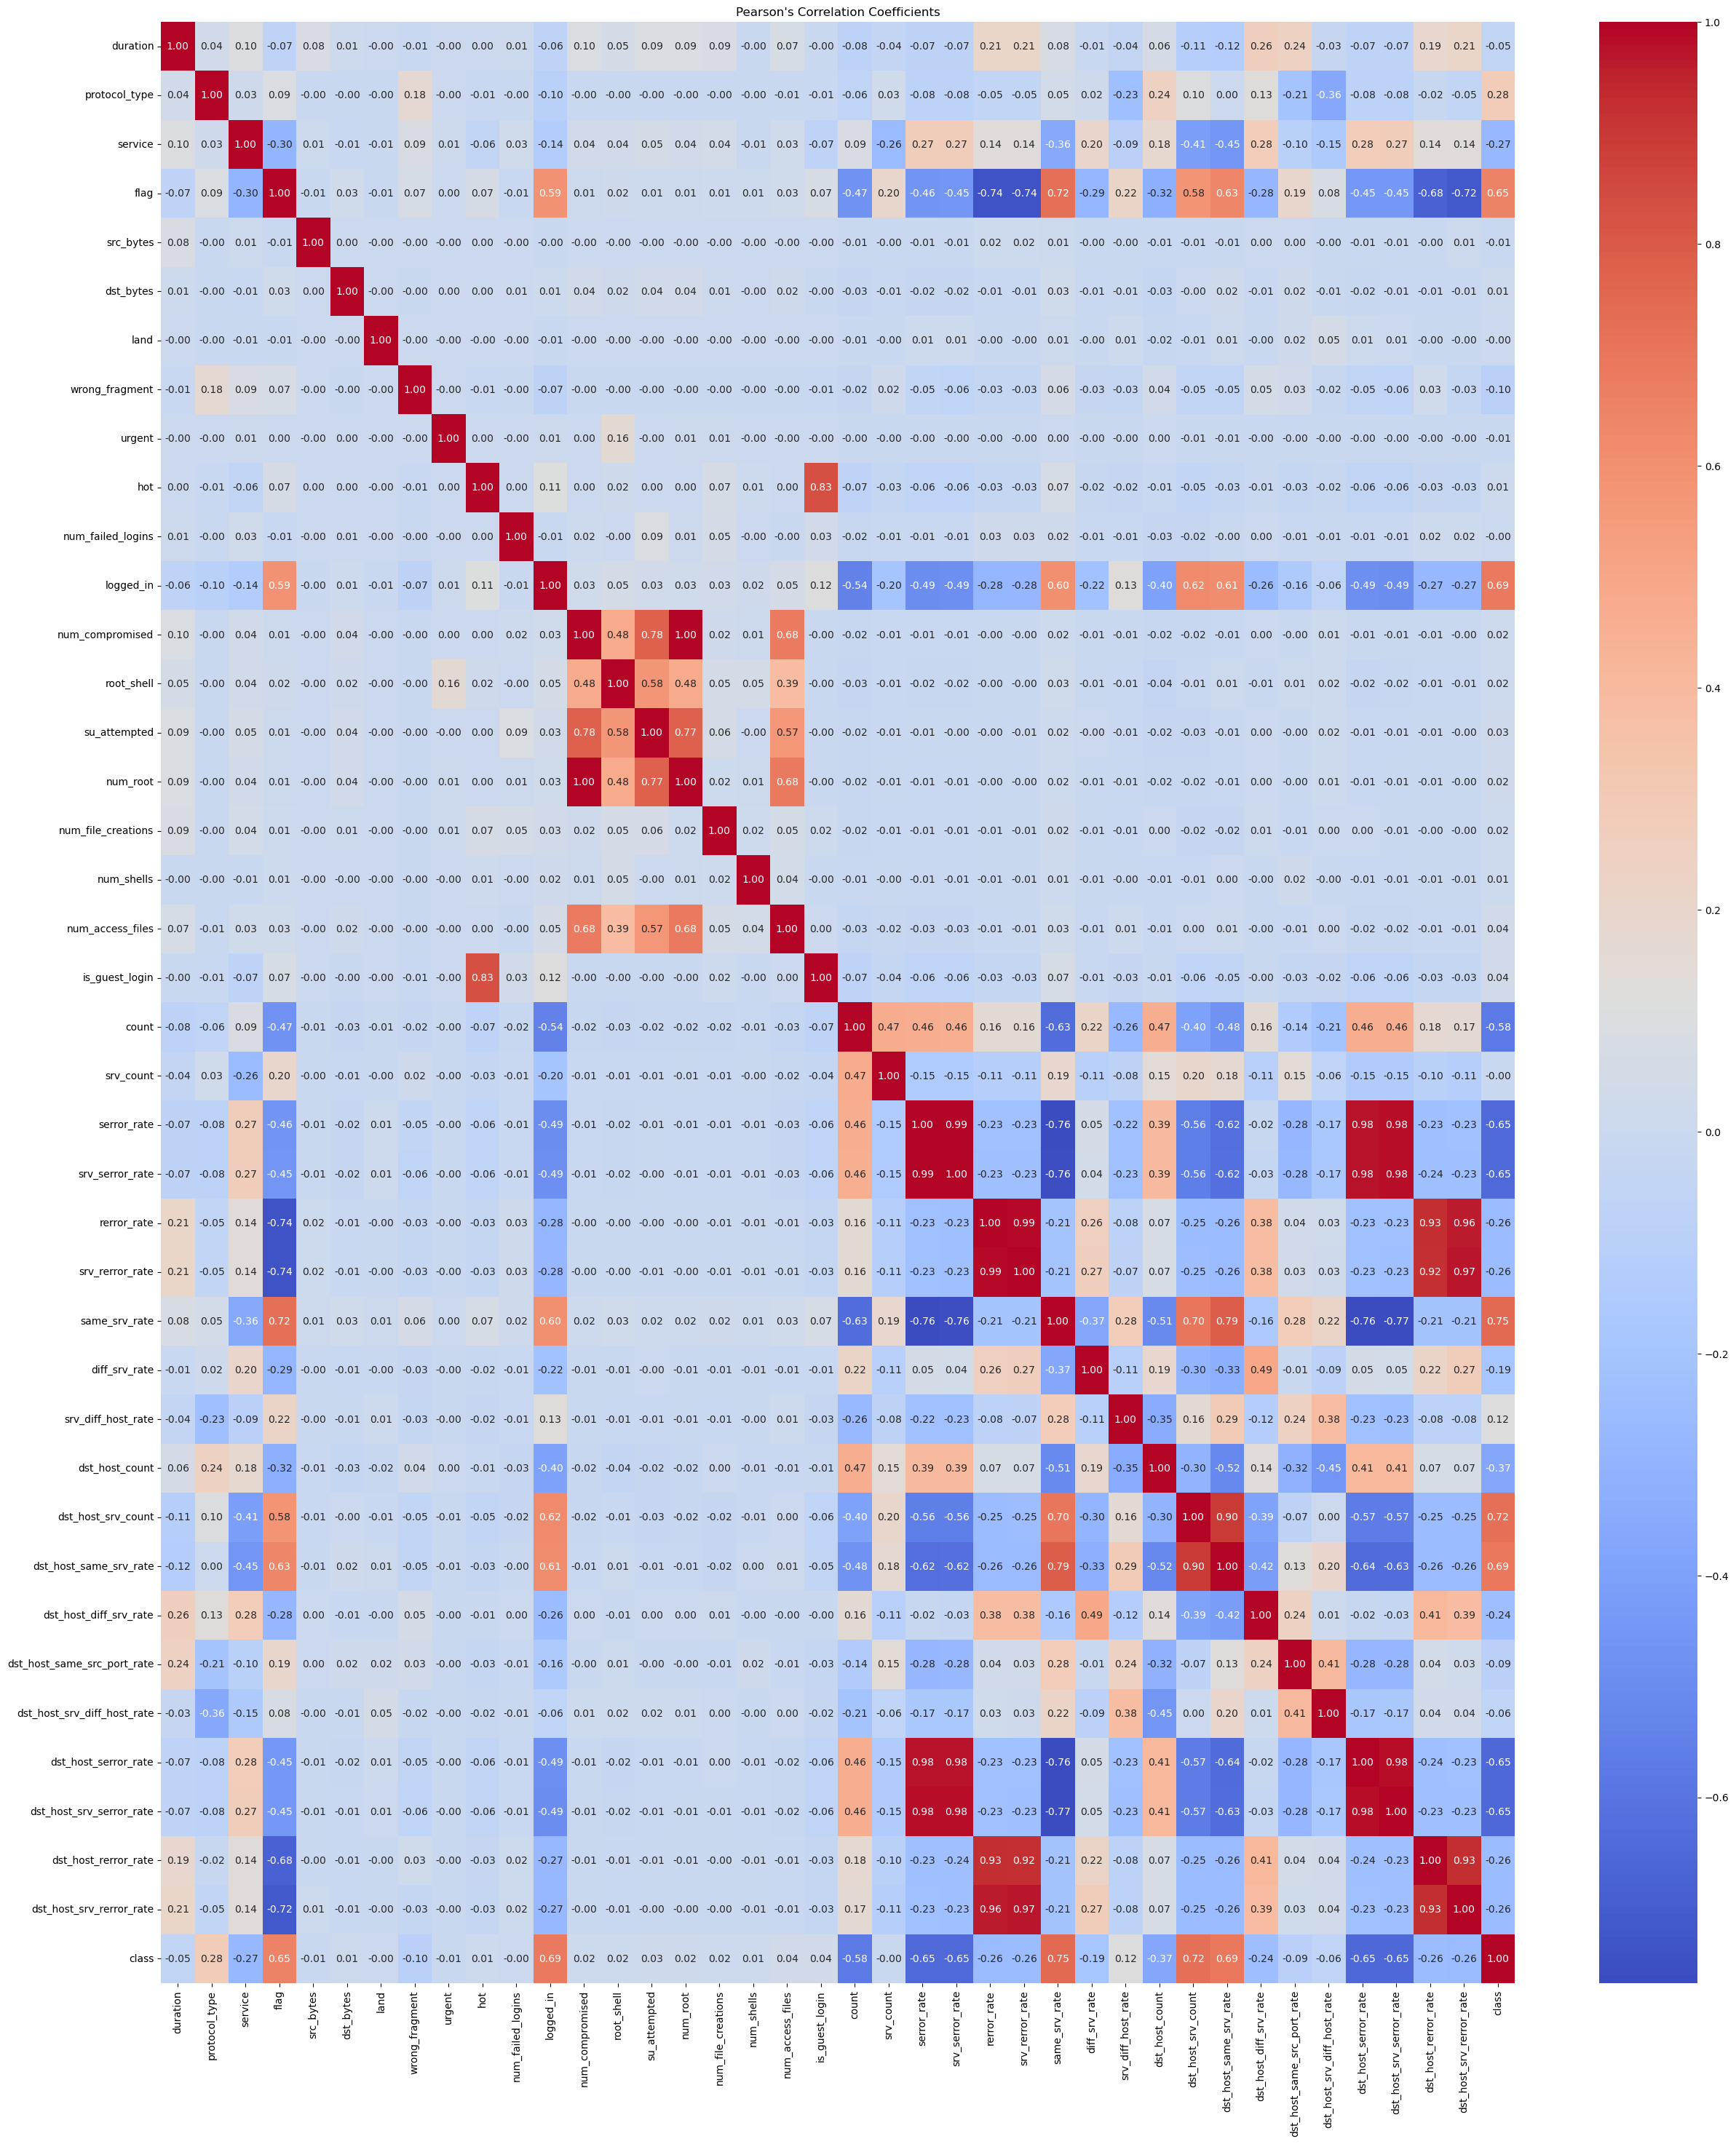

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'train'
# For example, if you have a DataFrame like this:
# train = pd.DataFrame({
#     'feature1': [values],
#     'feature2': [values],
#     ...
# })

# Calculate Pearson's correlation coefficients
correlation_matrix = train_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30,35))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title("Pearson's Correlation Coefficients")
plt.show()


In [62]:
correlations = train_cleaned.corrwith(train['class'])

In [63]:
relevant_features = correlations[abs(correlations) > 0.2].index

In [64]:
selected_train_pearson = train_cleaned[relevant_features]

In [65]:
selected_train_pearson

,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,19,9,0,2,0.0,0.0,0.0,0.0,1.00,150,25,0.17,0.03,0.00,0.00,0.05,0.00,1
1,2,41,9,0,13,0.0,0.0,0.0,0.0,0.08,255,1,0.00,0.60,0.00,0.00,0.00,0.00,1
2,1,46,5,0,123,1.0,1.0,0.0,0.0,0.05,255,26,0.10,0.05,1.00,1.00,0.00,0.00,0
3,1,22,9,1,5,0.2,0.2,0.0,0.0,1.00,30,255,1.00,0.00,0.03,0.01,0.00,0.01,1
4,1,22,9,1,30,0.0,0.0,0.0,0.0,1.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,0,100,0.0,0.0,1.0,1.0,0.07,255,7,0.03,0.06,0.00,0.00,1.00,1.00,0
25188,1,19,9,1,1,0.0,0.0,0.0,0.0,1.00,1,39,1.00,0.00,0.00,0.00,0.00,0.00,0
25189,1,46,1,0,105,0.0,0.0,1.0,1.0,0.07,255,13,0.05,0.07,0.00,0.00,1.00,1.00,0
25190,1,38,5,0,129,1.0,1.0,0.0,0.0,0.14,255,20,0.08,0.06,1.00,1.00,0.00,0.00,0


In [66]:
#spearman

In [67]:
from scipy.stats import spearmanr


correlations, _ = spearmanr(train_cleaned.drop('class', axis=1), train_cleaned['class'])


In [68]:
threshold = 0.2


relevant_feature_indices = np.where(abs(correlations) > threshold)[0]

In [69]:
selected_train_spearman = train_cleaned.iloc[:, relevant_feature_indices]

In [70]:
selected_train_spearman

,duration,duration,duration,duration,duration,duration,protocol_type,protocol_type,protocol_type,protocol_type,...,class,class,class,class,class,class,class,class,class,class
0,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
25188,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
25189,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
25190,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
selected_train_spearman = selected_train_spearman.T.drop_duplicates().T

In [72]:
selected_train_spearman

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1.0,19.0,9.0,491.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1.0
1,0.0,2.0,41.0,9.0,146.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1.0
2,0.0,1.0,46.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0
3,0.0,1.0,22.0,9.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.0
4,0.0,1.0,22.0,9.0,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,1.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0.0
25188,0.0,1.0,19.0,9.0,334.0,0.0,0.0,0.0,0.0,0.0,...,39.0,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0.0
25189,0.0,1.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0.0
25190,0.0,1.0,38.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.0


In [73]:
X_train = selected_train_pearson.drop(['class'],axis = 1)
Y_train = selected_train_pearson['class']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
x_train

,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
1312,1,46,5,0,280,1.0,1.0,0.0,0.0,0.06,140,18,0.13,0.07,0.99,1.0,0.00,0.0
536,1,17,5,0,74,1.0,1.0,0.0,0.0,0.27,255,58,0.23,0.04,1.00,1.0,0.00,0.0
12385,1,6,1,0,228,0.0,0.0,1.0,1.0,0.08,255,19,0.07,0.07,0.00,0.0,1.00,1.0
24516,2,41,9,0,54,0.0,0.0,0.0,0.0,0.06,255,3,0.01,0.09,0.00,0.0,0.61,0.0
19896,1,22,9,1,2,0.0,0.0,0.0,0.0,1.00,4,255,1.00,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,1,22,9,1,3,0.0,0.0,0.0,0.0,1.00,3,35,1.00,0.00,0.00,0.0,0.00,0.0
11798,1,17,9,0,1,0.0,0.0,0.0,0.0,1.00,20,3,0.15,0.10,0.00,0.0,0.00,0.0
6637,1,22,9,1,3,0.0,0.0,0.0,0.0,1.00,3,255,1.00,0.00,0.00,0.0,0.00,0.0
2575,1,57,5,0,28,1.0,1.0,0.0,0.0,0.21,255,64,0.25,0.02,1.00,1.0,0.00,0.0


In [75]:
y_train

1312     0
536      0
12385    0
24516    0
19896    1
        ..
18898    1
11798    1
6637     1
2575     0
23720    0
Name: class, Length: 17634, dtype: int32

In [76]:
#variance threshold
from sklearn.feature_selection import VarianceThreshold

In [77]:
selector=VarianceThreshold(threshold=0.2)

In [78]:
selector

VarianceThreshold(threshold=0.2)

In [92]:
selector.fit(X_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


VarianceThreshold(threshold=0.2)

In [93]:
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['service', 'flag', 'logged_in', 'count', 'serror_rate',
       'srv_serror_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate'],
      dtype='object')


In [94]:
num_selected_features = selector.get_support().sum()

In [95]:
print("Number of Selected Features:", num_selected_features)

Number of Selected Features: 9


In [111]:
import pandas as pd

# Assuming original_df is your original DataFrame
# selected_features is the list of selected feature names
selected_features_vt = ['service', 'flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate','class']

# Extract the DataFrame with selected features
selected_df_vt = train[selected_features_vt]

# selected_df now contains only the selected features


In [116]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming selected_df is your DataFrame with selected features, and y is your target variable
# Split the data into training and testing sets

# Assuming selected_df_vt is your DataFrame with selected features, and 'class' is the target variable column name
# Extract features (X) and target variable (y)
X = selected_df_vt.drop(columns=['class'])  # Features
y = selected_df_vt['class']  # Target variable

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, and y_test should have consistent numbers of samples



# Create a Random Forest Classifier
rf_classifier_vt = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier with the training data
rf_classifier_vt.fit(X_train1, y_train1)

# Make predictions on the test data
predictions_vt = rf_classifier_vt.predict(X_test1)

# Evaluate the model
accuracy_vt = accuracy_score(y_test1, predictions_vt)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Classification Report:")
print(classification_report(y_test1, predictions_vt))


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Accuracy: 99.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [120]:
rf_classifier_vt = RandomForestClassifier(n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [122]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(rf_classifier_vt, X, y, cv=5)
print("Cross-Validation Scores: ", scores1)
print("Mean CV Accuracy: {:.2f}%".format(scores1.mean() * 100))

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Cross-Validation Scores:  [0.96546934 0.96745386 0.96685193 0.96149266 0.96566098]
Mean CV Accuracy: 96.54%


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [108]:
print(X_train.shape)  # Check the number of rows in X_train
print(y_train.shape)  # Check the number of rows in y_train


(25192, 18)
(17634,)


In [124]:
#chi2
from sklearn.feature_selection import chi2,SelectKBest

In [131]:
cs = SelectKBest(score_func=chi2,k=9)
cs.fit(X_train,y_train)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},x_train.columns)
feature_score.nlargest(n=18,columns="Score")

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: Length of values (9) does not match length of index (18)

In [80]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [81]:
rf_classifier.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier(random_state=42)

In [82]:
predictions = rf_classifier.predict(x_test)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [83]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.35%


In [84]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3498
           1       0.99      1.00      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [85]:
rf_classifier2 = RandomForestClassifier(n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier2, x_train, y_train, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean CV Accuracy: {:.2f}%".format(scores.mean() * 100))


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Cross-Validation Scores:  [0.96682733 0.96852849 0.96909555 0.96484264 0.96511628]
Mean CV Accuracy: 96.69%


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


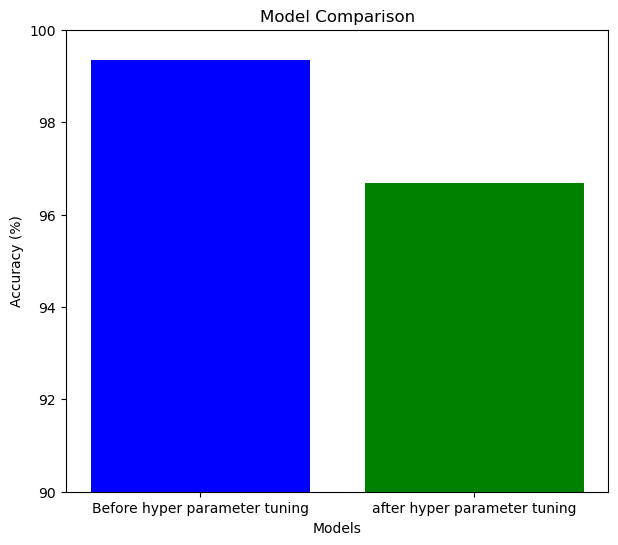

In [87]:
import matplotlib.pyplot as plt

# Accuracy scores for the two models
accuracy_score1 = [99.35]  # Replace your_second_model_accuracy with the accuracy of your second model
accuracy_score2 = [96.69]
# Model names for the x-axis labels
model_name1 = ['Before hyper parameter tuning']
model_name2 = ['after hyper parameter tuning']
# Create a bar plot
plt.figure(figsize=(7, 6))
plt.bar(model_name1, accuracy_score1, color=['blue'])
plt.bar(model_name2, accuracy_score2, color=['green'])
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for accuracy percentage
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')

#plt.xlim(90, 100)
plt.ylim(90, 100)
plt.show()


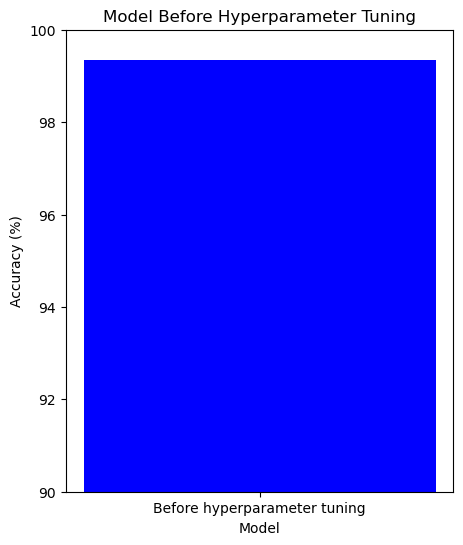

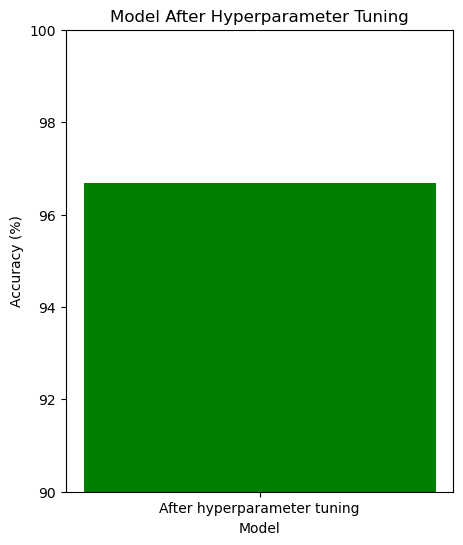

In [88]:
import matplotlib.pyplot as plt

# Accuracy scores for the two models
accuracy_score1 = [99.35]  # Replace your_second_model_accuracy with the accuracy of your second model
accuracy_score2 = [96.69]

# Model names for the x-axis labels
model_name1 = ['Before hyperparameter tuning']
model_name2 = ['After hyperparameter tuning']

# Create the first bar plot
plt.figure(figsize=(5, 6))
plt.bar(model_name1, accuracy_score1, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Before Hyperparameter Tuning')
plt.ylim(90, 100)  # Set y-axis limit from 90 to 100 for accuracy percentage
plt.show()

# Create the second bar plot
plt.figure(figsize=(5, 6))
plt.bar(model_name2, accuracy_score2, color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model After Hyperparameter Tuning')
plt.ylim(90, 100)  # Set y-axis limit from 90 to 100 for accuracy percentage
plt.show()
